In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sps
import json
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs with the corresponding cities and countries
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Using citipy.nearest_city, identify nearest city for each lat/lng set
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
# Setting up dataframe of target cities
cities_df = pd.DataFrame(data=cities)
cities_df["City"] = cities
cities_df["Country"] = countries
cities_df = cities_df.drop([0], axis = 1)
cities_df = cities_df.drop_duplicates()
cities_df

,City,Country
0,aksehir,tr
1,taolanaro,mg
2,hilo,us
3,tomari,ru
4,khatanga,ru
...,...,...
610,puga,mx
611,khani,ru
612,airai,pw
613,matay,eg


In [4]:
# Set variables lists to store data
all_cities = []
all_countries = []
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
dates = []

# itterate through cities_df to make api call using city, country, and api key in query_url
for index, row in cities_df.iterrows():
     
        try:
            city = row["City"]
            country = row["Country"]
            city_num = index + 1
            query_url = f"{url}q={city}&{country}&appid={api_key}" # Input city and country for api request...
            current_weather = requests.get(query_url) # to get current weather data...
            weather_json = current_weather.json() # and convert it into a json object
            
            lat = weather_json["coord"]["lat"]   
            lon = weather_json["coord"]["lon"] 
            k_temp = weather_json["main"]["temp_max"] 
            max_temp = (k_temp - 273.15) * 9/5 + 32   # Converting the max temperature from Kelvin to Fahrenheit       
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"] 
            unix_date = weather_json["dt"]
            reg_date = datetime.utcfromtimestamp(unix_date).strftime('%Y-%m-%d') # changing 'dt' from unix datetime formate
            
            # Appending all our chosen variables to lists above
            
            lats.append(lat)
            lons.append(lon)
            max_temps.append(max_temp)
            humidities.append(humidity)
            clouds.append(cloudiness)
            wind_speeds.append(wind_speed)
            dates.append(reg_date)
            all_cities.append(city)
            all_countries.append(country)            
         
            print(f"Retrieving Results for city #{city_num} : {city}, {country}")
        except:
            print("unable to locate city. skipping...")

Retrieving Results for city #1 : aksehir, tr
unable to locate city. skipping...
Retrieving Results for city #3 : hilo, us
Retrieving Results for city #4 : tomari, ru
Retrieving Results for city #5 : khatanga, ru
Retrieving Results for city #6 : nanakuli, us
Retrieving Results for city #7 : new norfolk, au
Retrieving Results for city #8 : pijijiapan, mx
Retrieving Results for city #9 : busselton, au
Retrieving Results for city #10 : lompoc, us
Retrieving Results for city #11 : mataura, pf
unable to locate city. skipping...
Retrieving Results for city #13 : port elizabeth, za
Retrieving Results for city #14 : samarai, pg
Retrieving Results for city #15 : vanavara, ru
Retrieving Results for city #16 : adrar, dz
Retrieving Results for city #17 : alofi, nu
Retrieving Results for city #18 : tuatapere, nz
Retrieving Results for city #19 : hermanus, za
Retrieving Results for city #20 : port alfred, za
Retrieving Results for city #21 : tasiilaq, gl
Retrieving Results for city #22 : arlit, ne
Re

Retrieving Results for city #177 : henties bay, na
Retrieving Results for city #178 : srednekolymsk, ru
Retrieving Results for city #179 : victoria, sc
Retrieving Results for city #180 : hamilton, bm
Retrieving Results for city #181 : east london, za
unable to locate city. skipping...
Retrieving Results for city #183 : codrington, ag
Retrieving Results for city #184 : maniitsoq, gl
Retrieving Results for city #185 : moindou, nc
Retrieving Results for city #186 : bathsheba, bb
Retrieving Results for city #187 : sioux lookout, ca
Retrieving Results for city #188 : pisco, pe
Retrieving Results for city #189 : esna, eg
Retrieving Results for city #190 : mamallapuram, in
Retrieving Results for city #191 : provideniya, ru
Retrieving Results for city #192 : ponta do sol, cv
Retrieving Results for city #193 : ancud, cl
Retrieving Results for city #194 : newport, us
unable to locate city. skipping...
unable to locate city. skipping...
Retrieving Results for city #197 : inhambane, mz
Retrieving 

unable to locate city. skipping...
Retrieving Results for city #353 : dromolaxia, cy
Retrieving Results for city #354 : ostersund, se
Retrieving Results for city #355 : ramapuram, in
Retrieving Results for city #356 : nishihara, jp
Retrieving Results for city #357 : krasnoselkup, ru
Retrieving Results for city #358 : mountain home, us
Retrieving Results for city #359 : kruisfontein, za
Retrieving Results for city #360 : hoopstad, za
unable to locate city. skipping...
Retrieving Results for city #362 : saint-leu, re
Retrieving Results for city #363 : richards bay, za
Retrieving Results for city #364 : alta floresta, br
Retrieving Results for city #365 : sakaiminato, jp
Retrieving Results for city #366 : saurimo, ao
Retrieving Results for city #367 : auki, sb
unable to locate city. skipping...
unable to locate city. skipping...
Retrieving Results for city #370 : kiskunfelegyhaza, hu
Retrieving Results for city #371 : korla, cn
Retrieving Results for city #372 : norman wells, ca
Retrievin

unable to locate city. skipping...
Retrieving Results for city #527 : kota kinabalu, my
Retrieving Results for city #528 : coromandel, nz
Retrieving Results for city #529 : gari, ru
Retrieving Results for city #530 : granger, us
Retrieving Results for city #531 : hue, vn
Retrieving Results for city #532 : mar del plata, ar
Retrieving Results for city #533 : oistins, bb
Retrieving Results for city #534 : college, us
Retrieving Results for city #535 : jacareacanga, br
Retrieving Results for city #536 : turukhansk, ru
unable to locate city. skipping...
Retrieving Results for city #538 : fukue, jp
Retrieving Results for city #539 : shipunovo, ru
Retrieving Results for city #540 : kyra, ru
Retrieving Results for city #541 : victor harbor, au
Retrieving Results for city #542 : ahuimanu, us
Retrieving Results for city #543 : serenje, zm
Retrieving Results for city #544 : lytkarino, ru
Retrieving Results for city #545 : ifo, ng
unable to locate city. skipping...
Retrieving Results for city #54

In [5]:
json.dumps(weather_json, indent=2, sort_keys=True)

'{\n  "base": "stations",\n  "clouds": {\n    "all": 0\n  },\n  "cod": 200,\n  "coord": {\n    "lat": -28.55,\n    "lon": 16.4333\n  },\n  "dt": 1614636235,\n  "id": 3354071,\n  "main": {\n    "feels_like": 293.33,\n    "grnd_level": 1011,\n    "humidity": 77,\n    "pressure": 1014,\n    "sea_level": 1014,\n    "temp": 292.45,\n    "temp_max": 292.45,\n    "temp_min": 292.45\n  },\n  "name": "Oranjemund",\n  "sys": {\n    "country": "NA",\n    "sunrise": 1614660427,\n    "sunset": 1614705962\n  },\n  "timezone": 7200,\n  "visibility": 10000,\n  "weather": [\n    {\n      "description": "clear sky",\n      "icon": "01n",\n      "id": 800,\n      "main": "Clear"\n    }\n  ],\n  "wind": {\n    "deg": 146,\n    "speed": 1.13\n  }\n}'

In [6]:
# Zipping our lists together and adding column names in appropriate order to create dataframe of weather on specified date
weather_frame = pd.DataFrame(list(zip(all_cities, all_countries, lats, lons, max_temps, humidities,clouds,wind_speeds,dates)),
               columns =["city", "country", "lat", "lng", "max_temp (f)", "humidity (%)", "cloudiness (%)", "wind_speed (mph)", "date"])
weather_frame

,city,country,lat,lng,max_temp (f),humidity (%),cloudiness (%),wind_speed (mph),date
0,aksehir,tr,38.3575,31.4164,32.738,84,1,1.69,2021-03-01
1,hilo,us,19.7297,-155.0900,77.000,65,75,7.20,2021-03-01
2,tomari,ru,47.7658,142.0683,12.542,92,100,2.99,2021-03-01
3,khatanga,ru,71.9667,102.5000,-32.116,85,96,1.72,2021-03-01
4,nanakuli,us,21.3906,-158.1547,78.800,50,1,6.69,2021-03-01
...,...,...,...,...,...,...,...,...,...
547,puga,mx,21.5833,-104.8167,86.000,37,40,5.14,2021-03-01
548,khani,ru,41.9563,42.9566,35.600,93,75,1.54,2021-03-01
549,airai,pw,-8.9266,125.4092,59.180,100,81,0.76,2021-03-01
550,matay,eg,28.4190,30.7792,53.942,63,0,4.83,2021-03-01


In [7]:
weather_frame.to_csv("output_data/weather_csv", index=None)

In [8]:
weather_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              552 non-null    object 
 1   country           552 non-null    object 
 2   lat               552 non-null    float64
 3   lng               552 non-null    float64
 4   max_temp (f)      552 non-null    float64
 5   humidity (%)      552 non-null    int64  
 6   cloudiness (%)    552 non-null    int64  
 7   wind_speed (mph)  552 non-null    float64
 8   date              552 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 38.9+ KB


In [9]:
weather_frame["humidity (%)"].sort_values(ascending=False)

499    100
29     100
266    100
159    100
132    100
      ... 
339     12
338     12
141     12
235      9
124      7
Name: humidity (%), Length: 552, dtype: int64

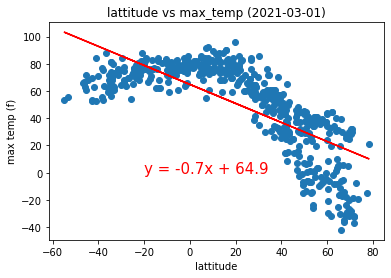

In [10]:
# Comparing lattitude with maximum temperature
the_lats = weather_frame["lat"]
date = weather_frame["date"][0]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, max_temps)
regress_values = the_lats * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.scatter(the_lats, max_temps)
plt.plot(lats, regress_values, "r-")
plt.annotate(line_eq,(-20, 0),fontsize=15,color="red")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"lattitude vs max_temp ({date})")
plt.savefig("output_data/lattitude_vs_max_temp.png")

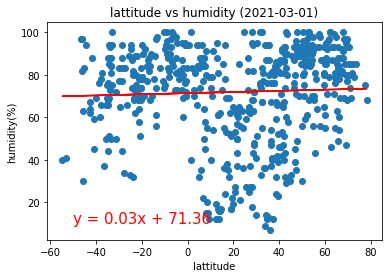

In [11]:
# Comparing lattitude with humidity
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(lats, humidities)
regress_values = the_lats * slope + intercept

plt.scatter(lats, humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity(%)")
plt.title(f"lattitude vs humidity ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_humidity.png")

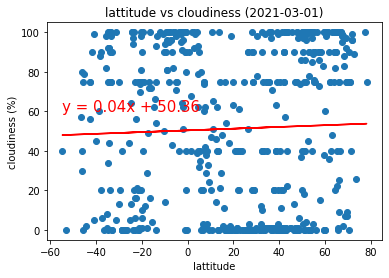

In [12]:
# Comparing lattitude with cloudiness %
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, clouds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"lattitude vs cloudiness ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_cloudiness.png")

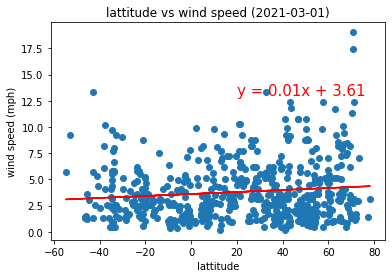

In [13]:
# Comparing lattitude with wind speed 
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, wind_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, wind_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"lattitude vs wind speed ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(20,13),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_wind_speed.png")

In [14]:
# Breaking up dataset to analyze northern... 
northern_df = weather_frame[weather_frame["lat"] > 0]
northern_df

,city,country,lat,lng,max_temp (f),humidity (%),cloudiness (%),wind_speed (mph),date
0,aksehir,tr,38.3575,31.4164,32.738,84,1,1.69,2021-03-01
1,hilo,us,19.7297,-155.0900,77.000,65,75,7.20,2021-03-01
2,tomari,ru,47.7658,142.0683,12.542,92,100,2.99,2021-03-01
3,khatanga,ru,71.9667,102.5000,-32.116,85,96,1.72,2021-03-01
4,nanakuli,us,21.3906,-158.1547,78.800,50,1,6.69,2021-03-01
...,...,...,...,...,...,...,...,...,...
544,dawlatabad,af,36.4141,64.9053,55.580,37,97,1.19,2021-03-01
546,san felipe,mx,10.3399,-68.7425,73.688,74,47,4.33,2021-03-01
547,puga,mx,21.5833,-104.8167,86.000,37,40,5.14,2021-03-01
548,khani,ru,41.9563,42.9566,35.600,93,75,1.54,2021-03-01


In [15]:
# ... and southern hemisphers ... 
southern_df = weather_frame[weather_frame["lat"] < 0]
southern_df

,city,country,lat,lng,max_temp (f),humidity (%),cloudiness (%),wind_speed (mph),date
5,new norfolk,au,-42.7826,147.0587,53.006,67,56,1.34,2021-03-01
7,busselton,au,-33.6500,115.3333,64.004,88,98,0.45,2021-03-01
9,mataura,pf,-46.1927,168.8643,66.002,97,30,1.34,2021-03-01
10,port elizabeth,za,-33.9180,25.5701,68.000,94,20,2.06,2021-03-01
11,samarai,pg,-10.6167,150.6667,82.328,77,99,4.40,2021-03-01
...,...,...,...,...,...,...,...,...,...
536,necochea,ar,-38.5473,-58.7368,77.000,76,60,1.34,2021-03-01
538,batemans bay,au,-35.7167,150.1833,62.006,50,98,1.34,2021-03-01
545,grand baie,mu,-20.0182,57.5802,75.992,79,6,3.13,2021-03-01
549,airai,pw,-8.9266,125.4092,59.180,100,81,0.76,2021-03-01


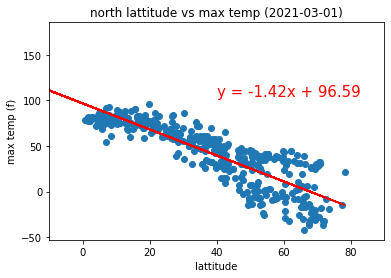

In [16]:
# ... and then running the same analysis on each hemisphere independantly
north_lats = northern_df["lat"]
north_temps = northern_df["max_temp (f)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_temps)
regress_values = the_lats * slope + intercept

plt.scatter(north_lats, north_temps)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"north lattitude vs max temp ({date})")
plt.xlim(-10, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(40,105),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_temp.png")

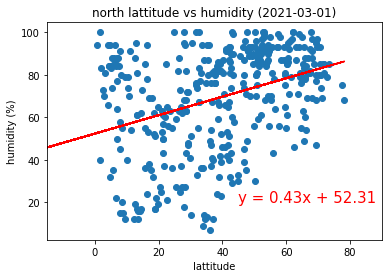

In [17]:
north_humidities = northern_df["humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_humidities)
regress_values = the_lats * slope + intercept

plt.scatter(north_lats, north_humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity (%)")
plt.title(f"north lattitude vs humidity ({date})")
plt.xlim(-15, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_humidity.png")

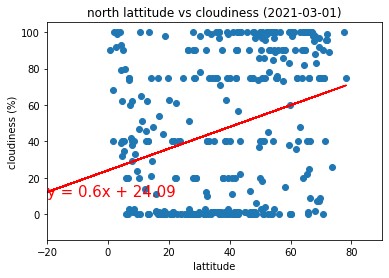

In [18]:
north_clouds = northern_df["cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_clouds)
regress_values = the_lats * slope + intercept
plt.scatter(north_lats, north_clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"north lattitude vs cloudiness ({date})")
plt.xlim(-20, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_noth_cloudiness.png")

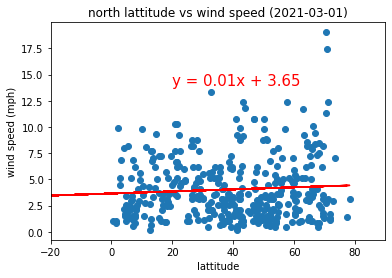

In [19]:
north_speeds = northern_df["wind_speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_speeds)
regress_values = the_lats * slope + intercept
plt.scatter(north_lats, north_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"north lattitude vs wind speed ({date})")
plt.xlim(-20, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(20,14),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_speed.png")

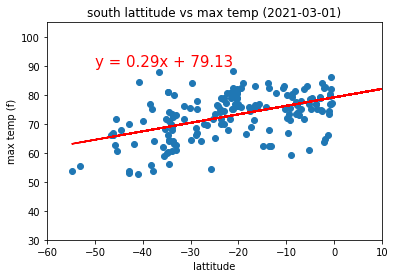

In [20]:
south_lats = southern_df["lat"]
south_temps = southern_df["max_temp (f)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_temps)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_temps)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"south lattitude vs max temp ({date})")
plt.xlim(-60,10)
plt.ylim(30,105)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_temp.png")

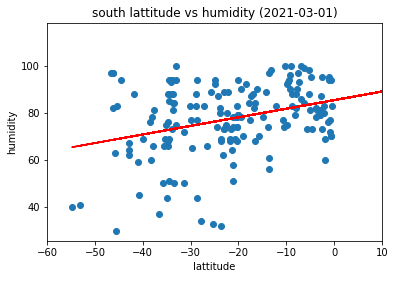

In [21]:
south_humidities = southern_df["humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_humidities)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity")
plt.title(f"south lattitude vs humidity ({date})")
plt.xlim(-60,10)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_humidity.png")

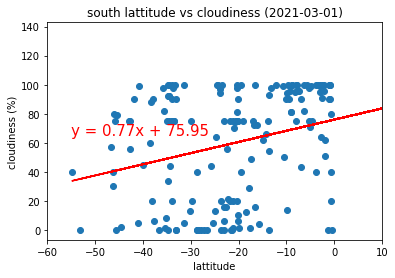

In [22]:
south_clouds = southern_df["cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_clouds)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"south lattitude vs cloudiness ({date})")
plt.xlim(-60,10)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_clouds.png")

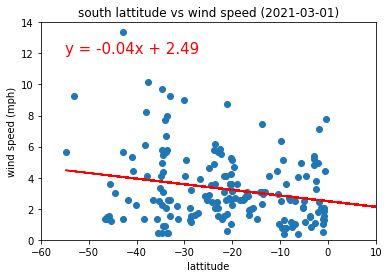

In [23]:
south_speeds = southern_df["wind_speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"south lattitude vs wind speed ({date})")
plt.xlim(-60,10)
plt.ylim(0,14)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_speeds.png")